# Importar bibliotecas

In [62]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from textblob import TextBlob
from nltk.tokenize import word_tokenize

# download de stopwords de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Análise de sentimento

In [63]:
df_twitter = pd.read_csv('twitter_en_data.csv', sep=',')
df_twitter

,Embedded_text
0,"i will not give context, i just find this imag..."
1,"MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi..."
2,Foreign types with the hookah pipes say ay oh ...
3,I use to have my autocorrect change “way” to “...
4,smelling my brother's bottle of whey protein p...
...,...
4991,who up soundin their fury rn
4992,Working hard on my crossfit.\n#CatsOfTwitter #...
4993,Change your life. \n\nAnyone can do it. Start ...
4994,Shit is about to get incredibly annoying


In [64]:
df_twitter['Sentiment'] = df_twitter['Embedded_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [65]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
df_twitter[['polaridade_num', 'polaridade_texto']] = df_twitter['Sentiment'].apply(polaridade).apply(pd.Series)
df_twitter

,Embedded_text,Sentiment,polaridade_num,polaridade_texto
0,"i will not give context, i just find this imag...",0.250000,1,Positivo
1,"MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi...",0.540000,1,Positivo
2,Foreign types with the hookah pipes say ay oh ...,-0.125000,-1,Negativo
3,I use to have my autocorrect change “way” to “...,0.000000,0,Neutro
4,smelling my brother's bottle of whey protein p...,0.000000,0,Neutro
...,...,...,...,...
4991,who up soundin their fury rn,0.000000,0,Neutro
4992,Working hard on my crossfit.\n#CatsOfTwitter #...,-0.291667,-1,Negativo
4993,Change your life. \n\nAnyone can do it. Start ...,0.000000,0,Neutro
4994,Shit is about to get incredibly annoying,-0.500000,-1,Negativo


In [66]:
df_twitter.to_csv('df_twitter_sentiment.csv')

## Contagem de polaridade

In [67]:
df1= pd.read_csv('df_twitter_sentiment.csv')
df1

,Unnamed: 0,Embedded_text,Sentiment,polaridade_num,polaridade_texto
0,0,"i will not give context, i just find this imag...",0.250000,1,Positivo
1,1,"MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi...",0.540000,1,Positivo
2,2,Foreign types with the hookah pipes say ay oh ...,-0.125000,-1,Negativo
3,3,I use to have my autocorrect change “way” to “...,0.000000,0,Neutro
4,4,smelling my brother's bottle of whey protein p...,0.000000,0,Neutro
...,...,...,...,...,...
4991,4991,who up soundin their fury rn,0.000000,0,Neutro
4992,4992,Working hard on my crossfit.\n#CatsOfTwitter #...,-0.291667,-1,Negativo
4993,4993,Change your life. \n\nAnyone can do it. Start ...,0.000000,0,Neutro
4994,4994,Shit is about to get incredibly annoying,-0.500000,-1,Negativo


In [68]:
positive_twitter = df1[df1['polaridade_texto'] == 'Positivo'].shape[0]
negative_twitter = df1[df1['polaridade_texto'] == 'Negativo'].shape[0]
neutral_twitter = df1[df1['polaridade_texto'] == 'Neutro'].shape[0]

print("Quantidade de sentimento positivo:", positive_twitter)
print("Quantidade de sentimento negativo:", negative_twitter)
print("Quantidade de sentimento neutro:", neutral_twitter)

Quantidade de sentimento positivo: 2235
Quantidade de sentimento negativo: 747
Quantidade de sentimento neutro: 2014


# Frequencia de palavras
**DESAFIO**
palavras/termos com alta frequência, mas em um contexto negativo para o público-alvo

In [69]:
df_neg = df1.loc[(df1['polaridade_texto']=='Negativo')]
df_neg

,Unnamed: 0,Embedded_text,Sentiment,polaridade_num,polaridade_texto
2,2,Foreign types with the hookah pipes say ay oh ...,-0.125000,-1,Negativo
18,18,I must be a mad man. Throw down a run before a...,-0.390278,-1,Negativo
20,20,Me wah know whey di bloodclaat old foot Biden ...,-0.200000,-1,Negativo
25,25,T-Minus 50 days until the 2022 NOBULL #CrossFi...,-0.229167,-1,Negativo
26,26,Congrats to the team winners of the \n@atlasga...,-0.055556,-1,Negativo
...,...,...,...,...,...
4974,4974,weight cut gonna be insane fr,-1.000000,-1,Negativo
4980,4980,Claims to hate pedos.\n\nStans the guy that sa...,-0.800000,-1,Negativo
4988,4988,5 Sets: (rest 2:30 b/w)\n\n3 Rounds\n-6 Alt Ha...,-0.750000,-1,Negativo
4992,4992,Working hard on my crossfit.\n#CatsOfTwitter #...,-0.291667,-1,Negativo


In [70]:
# Carregar stopword em ingles
stop_words_en = set(stopwords.words('english'))

# Adiciona stop words adicionais
additional_stop_words = ["day", "one", "workout","...","people","go","know","''","get","fitness","oh","'s","like","https","’",
                        "“","”","today","dey","na","2","say","1","time","``","work","want","game","games","going","see","3"]
stop_words_en.update(additional_stop_words)

In [71]:
# Junte todas as reviews em um único texto
twitter_text = ' '.join(df_neg['Embedded_text'].astype(str))

# Tokenize o texto em palavras
tokens = word_tokenize(twitter_text)

# Filtra as palavras para remover stopwords e pontuações
twitter_words = [word.lower() for word in tokens if word.lower() not in stop_words_en and word.lower() not in string.punctuation]

# Conta a frequência das palavras
twitter_word_freq = Counter(twitter_words)

In [72]:
df_wordfreq_twitter = pd.DataFrame.from_dict(twitter_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_twitter.columns = ['Palavra', 'Frequência']
display(df_wordfreq_twitter)

,Palavra,Frequência
0,foreign,9
1,types,10
2,hookah,9
3,pipes,9
4,ay,18
...,...,...
4585,snatch,1
4586,-3,1
4587,bbjo,1
4588,catsoftwitter,1


In [73]:
df_wordfreq_twitter = df_wordfreq_twitter.sort_values(by=['Frequência']).tail(20)
display(df_wordfreq_twitter)
#df_wordfreq_twitter.to_csv('df_wordfreqNEGATIVE_twitter.csv')

,Palavra,Frequência
551,fuck,22
378,bad,22
125,hate,23
466,make,24
363,still,24
1040,training,24
546,heavy,24
305,back,26
10,run,26
186,got,27


### Nuvem de palavras

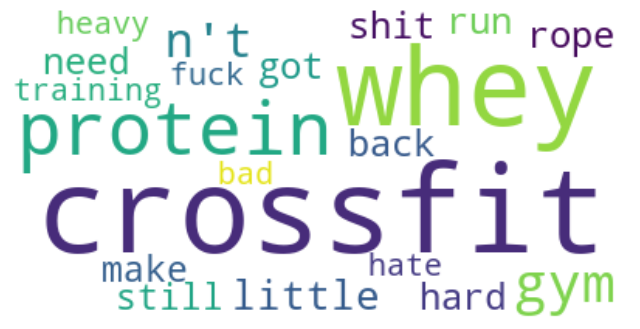

In [74]:
word_freq_dict = df_wordfreq_twitter.set_index('Palavra')['Frequência'].to_dict()

wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()